# About Series

* Series란?<br>
    Data의 컬럼이 1개인 자료구조이며, 인덱스와 1개의 열로 구성되어 있음

## Series 만드는 방법

* pd.Series()에 DataType이 1. 리스트 혹은 2.딕셔너리 로 만들 수 있음<br>

* 딕셔너리의 경우 index와 value가 같이 만들어지며, 리스트의 경우 value만 지정

In [1]:
# 판다스 라이브러리(패키지) 불러오기
import pandas as pd

In [3]:
# Data Type이 '리스트'인 경우

ls1 = [1,2,3,4,5,6,7,8,9]

ls2 = [1,2,3,'Apple','play',6,7,8,9]

sr1 = pd.Series(ls1)
sr1

sr2 = pd.Series(ls2)
sr2

0        1
1        2
2        3
3    Apple
4     play
5        6
6        7
7        8
8        9
dtype: object

In [4]:
# Series에 Name설정
sr1.name = "Number"
sr2.name = "Word"
sr2

0        1
1        2
2        3
3    Apple
4     play
5        6
6        7
7        8
8        9
Name: Word, dtype: object

In [7]:
# Data Type이 '딕셔너리'인 경우
dic1 = {"a":1, 'b':2, "c":3, "d":4}

sr3 = pd.Series(dic1)
sr3
sr3.name = "Number"
sr3


a    1
b    2
c    3
d    4
Name: Number, dtype: int64

## 삼성전자 종가 Series로 불러오기

* path<br>
* index_col<br>
* header<br>
* squeeze

In [8]:
import pandas as pd

path = 'C:/Users/kangg/Google Drive/Project_Mine/(Infrun)강의제작/금융데이터 분석을 위한 판다스/Code/삼성전자 종가.csv'

a = pd.read_csv(path, index_col = 0, squeeze = True, header = 0)

a

Date
2018-01-02    51020
2018-01-03    51620
2018-01-04    51080
2018-01-05    52120
2018-01-08    52020
              ...  
2021-12-13    76800
2021-12-14    77000
2021-12-15    77600
2021-12-16    77800
2021-12-17    78000
Name: Close, Length: 977, dtype: int64

## Series Index & Value

In [16]:
import pandas as pd

# squeeze 매개변수는 최신버전에서 삭제되었음.
samsung_price = pd.read_csv('../Data/삼성전자 종가.csv', index_col = 0, squeeze = True, header = 0)
samsung_price

TypeError: read_csv() got an unexpected keyword argument 'squeeze'

In [17]:
samsung_price = pd.read_csv('../Data/삼성전자 종가.csv', index_col = 0, header = 0)

# DataFrame에 열이 하나만 있는 경우 이를 Series로 변환합니다. 
if len(samsung_price.columns) == 1: 
    samsung_price = samsung_price.squeeze()

# 이러면 위에 구버전 동작과 동일합니다.
samsung_price

Date
2018-01-02    51020
2018-01-03    51620
2018-01-04    51080
2018-01-05    52120
2018-01-08    52020
              ...  
2021-12-13    76800
2021-12-14    77000
2021-12-15    77600
2021-12-16    77800
2021-12-17    78000
Name: Close, Length: 977, dtype: int64

In [13]:
# samsung_price의 index만 따로 추출
samsung_price.index

Index(['2018-01-02', '2018-01-03', '2018-01-04', '2018-01-05', '2018-01-08',
       '2018-01-09', '2018-01-10', '2018-01-11', '2018-01-12', '2018-01-15',
       ...
       '2021-12-06', '2021-12-07', '2021-12-08', '2021-12-09', '2021-12-10',
       '2021-12-13', '2021-12-14', '2021-12-15', '2021-12-16', '2021-12-17'],
      dtype='object', name='Date', length=977)

In [ ]:
# '2020-12-15 Data가 있을까?'

if '2020-12-15' in samsung_price.index:
    print(samsung_price.loc['2020-12-15'])
else : 
    print("찾는값이 없습니다.")

samsung_price.loc['2020-12-15'] # 인덱스 값

73800


73800

In [ ]:
# 100번째 Dataq값은?

samsung_price.iloc[100] # 인덱스 번호

49500

## Series에 새로운 행을 추가하고 싶을때?

In [18]:
import pandas as pd

samsung_price = pd.read_csv('삼성전자 종가.csv', index_col = 0, squeeze = True, header = 0)
samsung_price

Date
2018-01-02    51020
2018-01-03    51620
2018-01-04    51080
2018-01-05    52120
2018-01-08    52020
              ...  
2021-12-13    76800
2021-12-14    77000
2021-12-15    77600
2021-12-16    77800
2021-12-17    78000
Name: Close, Length: 977, dtype: int64

In [ ]:
# samsung_price에 총 길이는?
samsung_price.shape

(977,)

In [17]:
samsung_price.index[samsung_price.shape[0]-1] # 마지막 인덱스

'2021-12-17'

In [ ]:
# samsung_price에 '2021-12-19'주가를 추가하고 싶다면? 이렇게 loc를 안써줘도 되지만 써주는게 좋다.
samsung_price['2021-12-20'] = 77100 # 추가
samsung_price
samsung_price['2021-12-20'] = 0 # 변경
samsung_price

Date
2018-01-02    51020
2018-01-03    51620
2018-01-04    51080
2018-01-05    52120
2018-01-08    52020
              ...  
2021-12-14    77000
2021-12-15    77600
2021-12-16    77800
2021-12-17    78000
2021-12-20        0
Name: Close, Length: 978, dtype: int64

In [21]:
# samsung_price에 '2021-12-19'주가를 추가하고 싶다면?
samsung_price.loc['2021-12-20'] = 77100
samsung_price
samsung_price.loc['2021-12-16'] = 0
samsung_price

Date
2018-01-02    51020
2018-01-03    51620
2018-01-04    51080
2018-01-05    52120
2018-01-08    52020
              ...  
2021-12-14    77000
2021-12-15    77600
2021-12-16        0
2021-12-17    78000
2021-12-20    77100
Name: Close, Length: 978, dtype: int64

In [27]:
samsung_price.describe()

count      978.000000
mean     57236.554192
std      14194.895001
min          0.000000
25%      46262.500000
50%      51300.000000
75%      70200.000000
max      91000.000000
Name: Close, dtype: float64

## 두개의 Series 연결

In [ ]:
import pandas as pd
#pd.set_option('display.max_rows', None)
# 해당 과거코드

series1_samsung = pd.read_excel('samsung_excel.xlsx', sheet_name = 'Sheet1', index_col = 0, squeeze = True)
series1_samsung

series2_samsung = pd.read_excel('samsung_excel.xlsx', sheet_name = 'Sheet2', index_col = 0, squeeze = True)
series2_samsung

series_samsung = series1_samsung.append(series2_samsung, ignore_index = False)
series_samsung

Date
2018-01-02    51020
2018-01-03    51620
2018-01-04    51080
2018-01-05    52120
2018-01-08    52020
              ...  
2021-12-20    77100
2021-12-21    78100
2021-12-22    79400
2021-12-23    79900
2021-12-24    80500
Name: Close, Length: 982, dtype: int64

In [11]:
import pandas as pd

# sheet_name 의 경우 숫자로 인덱스를 정해줘도된다. ex) sheet_name = 0
series1_samsung = pd.read_excel('../Data/samsung_excel.xlsx', sheet_name = 'Sheet1', index_col = 0)

# DataFrame에 열이 하나만 있는 경우 이를 Series로 변환합니다. 
if len(series1_samsung.columns) == 1: 
    series1_samsung = series1_samsung.squeeze()

series2_samsung = pd.read_excel('../Data/samsung_excel.xlsx', sheet_name = 'Sheet2', index_col = 0)
# DataFrame에 열이 하나만 있는 경우 이를 Series로 변환합니다. 
if len(series2_samsung.columns) == 1: 
    series2_samsung = series2_samsung.squeeze()

# pandas는 2.0 버전 이후로 append를 지원하지 않습니다.
# ignore_index = True -> 설정할 경우 새로운 데이터가 이전 데이터의 인덱스에 이어서 삽입된다.
series_samsung = pd.concat([series1_samsung, series2_samsung], ignore_index = False)
series_samsung

Date
2018-01-02    51020
2018-01-03    51620
2018-01-04    51080
2018-01-05    52120
2018-01-08    52020
              ...  
2021-12-20    77100
2021-12-21    78100
2021-12-22    79400
2021-12-23    79900
2021-12-24    80500
Name: Close, Length: 982, dtype: int64

## Series 기본 통계치 구하기

In [14]:
import pandas as pd

samsung_price = pd.read_csv('../Data/삼성전자 종가.csv', index_col = 0, header = 0)
samsung_price = samsung_price.squeeze()

samsung_price

Date
2018-01-02    51020
2018-01-03    51620
2018-01-04    51080
2018-01-05    52120
2018-01-08    52020
              ...  
2021-12-13    76800
2021-12-14    77000
2021-12-15    77600
2021-12-16    77800
2021-12-17    78000
Name: Close, Length: 977, dtype: int64

In [15]:
# 삼성전자 고점? 저점?

samsung_price.max()
samsung_price.min()

samsung_price.describe()

count      977.000000
mean     57295.854657
std      14084.402274
min      37450.000000
25%      46300.000000
50%      51300.000000
75%      70200.000000
max      91000.000000
Name: Close, dtype: float64

In [ ]:
samsung_price.index[samsung_price.values == samsung_price.max()] # 이렇게 해도되지만 아래 arg 이미 구현되어있음.
samsung_price.index[samsung_price.values == samsung_price.min()]

Index(['2019-01-04'], dtype='object', name='Date')

In [ ]:
samsung_price.argmin() # 가장 작은 행

246

In [20]:
samsung_price.values[samsung_price.argmin()]

37450

In [21]:
samsung_price.iloc[samsung_price.argmin()]

37450

In [22]:
samsung_price.index[samsung_price.argmin()]

'2019-01-04'

In [39]:
samsung_price.iloc[samsung_price.argmin()]
samsung_price.index[samsung_price.argmin()]
samsung_price.iloc[samsung_price.argmax()]
samsung_price.index[samsung_price.argmax()]

'2021-01-11'

## Series 연산
* 삼성전자 수익률 구하기

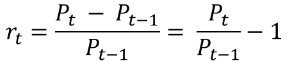

In [1]:
import pandas as pd

samsung_price = pd.read_csv('../Data/삼성전자 종가.csv', index_col = 0, header = 0)
samsung_price = samsung_price.squeeze()
samsung_price

Date
2018-01-02    51020
2018-01-03    51620
2018-01-04    51080
2018-01-05    52120
2018-01-08    52020
              ...  
2021-12-13    76800
2021-12-14    77000
2021-12-15    77600
2021-12-16    77800
2021-12-17    78000
Name: Close, Length: 977, dtype: int64

In [ ]:
samsung_price.shift(1) # 한칸 밀기

Date
2018-01-02        NaN
2018-01-03    51020.0
2018-01-04    51620.0
2018-01-05    51080.0
2018-01-08    52120.0
               ...   
2021-12-13    76900.0
2021-12-14    76800.0
2021-12-15    77000.0
2021-12-16    77600.0
2021-12-17    77800.0
Name: Close, Length: 977, dtype: float64

In [42]:
samsung_price - samsung_price.shift(1)

Date
2018-01-02       NaN
2018-01-03     600.0
2018-01-04    -540.0
2018-01-05    1040.0
2018-01-08    -100.0
               ...  
2021-12-13    -100.0
2021-12-14     200.0
2021-12-15     600.0
2021-12-16     200.0
2021-12-17     200.0
Name: Close, Length: 977, dtype: float64

In [43]:
samsung_return = (samsung_price - samsung_price.shift(1))/samsung_price.shift(1)
samsung_return

Date
2018-01-02         NaN
2018-01-03    0.011760
2018-01-04   -0.010461
2018-01-05    0.020360
2018-01-08   -0.001919
                ...   
2021-12-13   -0.001300
2021-12-14    0.002604
2021-12-15    0.007792
2021-12-16    0.002577
2021-12-17    0.002571
Name: Close, Length: 977, dtype: float64

In [ ]:
samsung_price.pct_change() # 수익률 메소드 존재

Date
2018-01-02         NaN
2018-01-03    0.011760
2018-01-04   -0.010461
2018-01-05    0.020360
2018-01-08   -0.001919
                ...   
2021-12-13   -0.001300
2021-12-14    0.002604
2021-12-15    0.007792
2021-12-16    0.002577
2021-12-17    0.002571
Name: Close, Length: 977, dtype: float64

In [45]:
samsung_return.max()

0.10470588235294118

In [46]:
samsung_return.index[samsung_return.argmax()]

'2020-03-24'

## Nan값

* Nan값 제거 = dropna()

* Nan값 채우기 = fillna()

* Nan값 연산 -> Nan값이 나옴

In [3]:
import pandas as pd

samsung_price = pd.read_csv('../Data/삼성전자 종가.csv', index_col = 0, header = 0)
samsung_price = samsung_price.squeeze()
samsung_return = (samsung_price - samsung_price.shift(1))/samsung_price.shift(1)
samsung_return

Date
2018-01-02         NaN
2018-01-03    0.011760
2018-01-04   -0.010461
2018-01-05    0.020360
2018-01-08   -0.001919
                ...   
2021-12-13   -0.001300
2021-12-14    0.002604
2021-12-15    0.007792
2021-12-16    0.002577
2021-12-17    0.002571
Name: Close, Length: 977, dtype: float64

In [49]:
samsung_return.dropna()

Date
2018-01-03    0.011760
2018-01-04   -0.010461
2018-01-05    0.020360
2018-01-08   -0.001919
2018-01-09   -0.031142
                ...   
2021-12-13   -0.001300
2021-12-14    0.002604
2021-12-15    0.007792
2021-12-16    0.002577
2021-12-17    0.002571
Name: Close, Length: 976, dtype: float64

In [50]:
samsung_return.fillna(0)

Date
2018-01-02    0.000000
2018-01-03    0.011760
2018-01-04   -0.010461
2018-01-05    0.020360
2018-01-08   -0.001919
                ...   
2021-12-13   -0.001300
2021-12-14    0.002604
2021-12-15    0.007792
2021-12-16    0.002577
2021-12-17    0.002571
Name: Close, Length: 977, dtype: float64

## 순서대로 정렬

* sort_values(ascending = True or False)

* sort_index(ascending = True or False)

In [ ]:
import pandas as pd

samsung_price = pd.read_csv('../Data/삼성전자 종가.csv', index_col = 0, header = 0)
samsung_price = samsung_price.squeeze()
samsung_return = (samsung_price - samsung_price.shift(1))/samsung_price.shift(1)
samsung_return

Date
2018-01-02         NaN
2018-01-03    0.011760
2018-01-04   -0.010461
2018-01-05    0.020360
2018-01-08   -0.001919
                ...   
2021-12-13   -0.001300
2021-12-14    0.002604
2021-12-15    0.007792
2021-12-16    0.002577
2021-12-17    0.002571
Name: Close, Length: 977, dtype: float64

In [52]:
# index순서대로 정렬
samsung_price.sort_index(ascending = True)

Date
2018-01-02    51020
2018-01-03    51620
2018-01-04    51080
2018-01-05    52120
2018-01-08    52020
              ...  
2021-12-13    76800
2021-12-14    77000
2021-12-15    77600
2021-12-16    77800
2021-12-17    78000
Name: Close, Length: 977, dtype: int64

In [53]:
# value순서대로 정렬
samsung_price.sort_values(ascending = True).head(30)

Date
2019-01-04    37450
2019-01-03    37600
2019-01-08    38100
2018-12-27    38250
2018-12-26    38350
              ...  
2018-10-25    41000
2018-10-26    41000
2019-01-15    41100
2019-05-17    41200
2018-10-29    41400
Name: Close, Length: 30, dtype: int64

## Series 조건설정

* 특정한(조건이 있는)값만 알아보고 싶을때 어떻게 해야될까?

* series.values or index [ 조건]

* (참고) Numpy에서 np.where

     np.where(조건문, 조건문이 참일때의 값, 조건문이 거짓일때의 값)

In [4]:
import pandas as pd
import numpy as np

samsung_price = pd.read_csv('../Data/삼성전자 종가.csv', index_col = 0, header = 0)
samsung_price = samsung_price.squeeze()
samsung_return = (samsung_price - samsung_price.shift(1))/samsung_price.shift(1)
samsung_return = samsung_return * 100
samsung_return

Date
2018-01-02         NaN
2018-01-03    1.176009
2018-01-04   -1.046106
2018-01-05    2.036022
2018-01-08   -0.191865
                ...   
2021-12-13   -0.130039
2021-12-14    0.260417
2021-12-15    0.779221
2021-12-16    0.257732
2021-12-17    0.257069
Name: Close, Length: 977, dtype: float64

In [5]:
sum(samsung_return.values >= 4)

17

In [55]:
samsung_return[samsung_return.values >= 4]

Date
2018-03-06     4.026549
2018-09-14     4.086266
2018-11-02     4.744958
2019-03-21     4.086266
2020-03-20     5.704307
2020-03-24    10.470588
2020-04-17     4.897959
2020-06-03     6.031128
2020-06-16     4.408818
2020-07-28     5.395683
2020-11-16     4.905063
2020-11-23     4.327666
2020-12-24     5.277402
2021-01-08     7.117008
2021-02-25     4.024390
2021-11-22     5.196629
2021-12-01     4.347826
Name: Close, dtype: float64

In [6]:
samsung_return.index[samsung_return.values >= 4]

Index(['2018-03-06', '2018-09-14', '2018-11-02', '2019-03-21', '2020-03-20',
       '2020-03-24', '2020-04-17', '2020-06-03', '2020-06-16', '2020-07-28',
       '2020-11-16', '2020-11-23', '2020-12-24', '2021-01-08', '2021-02-25',
       '2021-11-22', '2021-12-01'],
      dtype='object', name='Date')

In [7]:
samsung_return.values[samsung_return.values >= 4]

array([ 4.02654867,  4.08626561,  4.74495848,  4.08626561,  5.70430733,
       10.47058824,  4.89795918,  6.0311284 ,  4.40881764,  5.39568345,
        4.90506329,  4.32766615,  5.27740189,  7.11700844,  4.02439024,
        5.19662921,  4.34782609])

In [12]:
np.where(samsung_return.values >= 4, 1, 0) # 수익률 4% 이상이면 1, 아니면 0 으로 변경되어 시리즈 리턴

samsung_return_over_4 = pd.Series(np.where(samsung_return.values >= 4, "Over 4%", "Under"))
samsung_return_over_4.index = samsung_return.index
samsung_return_over_4.loc['2020-06-16']

'Over 4%'

## Series값의 구간을 나눠보자

* pd.cut(series, bins = ?) -> bins의 개수로 구간을 나눔
* pd.qcut(series, ?(숫자)) -> 동일한 개수로 구간을 나눔

In [13]:
import pandas as pd
import numpy as np

samsung_price = pd.read_csv('../Data/삼성전자 종가.csv', index_col = 0, header = 0)
samsung_price = samsung_price.squeeze()
samsung_return = (samsung_price - samsung_price.shift(1))/samsung_price.shift(1)
samsung_return

Date
2018-01-02         NaN
2018-01-03    0.011760
2018-01-04   -0.010461
2018-01-05    0.020360
2018-01-08   -0.001919
                ...   
2021-12-13   -0.001300
2021-12-14    0.002604
2021-12-15    0.007792
2021-12-16    0.002577
2021-12-17    0.002571
Name: Close, Length: 977, dtype: float64

In [19]:
pd.cut(samsung_return, bins=10) # 수익률을 10개의 구간으로 나눔.

Date
2018-01-02               NaN
2018-01-03    (0.356, 2.041]
2018-01-04    (-1.33, 0.356]
2018-01-05    (0.356, 2.041]
2018-01-08    (-1.33, 0.356]
                   ...      
2021-12-13    (-1.33, 0.356]
2021-12-14    (-1.33, 0.356]
2021-12-15    (0.356, 2.041]
2021-12-16    (-1.33, 0.356]
2021-12-17    (-1.33, 0.356]
Name: Close, Length: 977, dtype: category
Categories (10, interval[float64, right]): [(-6.405, -4.702] < (-4.702, -3.016] < (-3.016, -1.33] < (-1.33, 0.356] ... (3.727, 5.413] < (5.413, 7.099] < (7.099, 8.785] < (8.785, 10.471]]

In [16]:
# pd.cut()
pd.cut(samsung_return, bins=10)
pd.cut(samsung_return, bins=10).value_counts()

Close
(-1.33, 0.356]      414
(0.356, 2.041]      298
(-3.016, -1.33]     137
(2.041, 3.727]       70
(-4.702, -3.016]     31
(3.727, 5.413]       19
(-6.405, -4.702]      3
(5.413, 7.099]        2
(7.099, 8.785]        1
(8.785, 10.471]       1
Name: count, dtype: int64

In [17]:
#pd.qcut()
pd.qcut(samsung_return, 10)
pd.qcut(samsung_return, 10).value_counts()

Close
(-0.332, 0.0]       108
(-6.389, -1.938]     98
(-1.938, -1.161]     98
(-0.702, -0.332]     98
(0.753, 1.22]        98
(2.003, 10.471]      98
(-1.161, -0.702]     97
(0.358, 0.753]       97
(1.22, 2.003]        97
(0.0, 0.358]         87
Name: count, dtype: int64

## Series rolling

In [14]:
import pandas as pd
import numpy as np

samsung_price = pd.read_csv('../Data/삼성전자 종가.csv', index_col = 0, header = 0)
samsung_price = samsung_price.squeeze()
samsung_return = (samsung_price - samsung_price.shift(1))/samsung_price.shift(1)
samsung_return = samsung_return * 100
samsung_price

Date
2018-01-02    51020
2018-01-03    51620
2018-01-04    51080
2018-01-05    52120
2018-01-08    52020
              ...  
2021-12-13    76800
2021-12-14    77000
2021-12-15    77600
2021-12-16    77800
2021-12-17    78000
Name: Close, Length: 977, dtype: int64

In [15]:
samsung_price.rolling(window = 30).mean()

Date
2018-01-02             NaN
2018-01-03             NaN
2018-01-04             NaN
2018-01-05             NaN
2018-01-08             NaN
                  ...     
2021-12-13    73090.000000
2021-12-14    73273.333333
2021-12-15    73513.333333
2021-12-16    73753.333333
2021-12-17    74013.333333
Name: Close, Length: 977, dtype: float64

<AxesSubplot:xlabel='Date'>

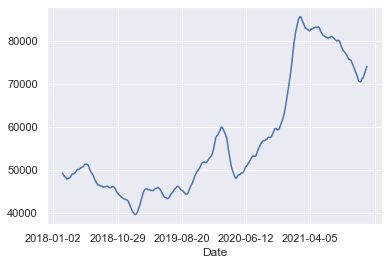

In [61]:
samsung_price.rolling(window = 30).mean().plot()

## 크기가 다른 두 Series

In [1]:
import pandas as pd
import numpy as np

samsung = pd.read_csv('../Data/삼성전자 종가.csv', index_col = 0, header = 0)
samsung = samsung.squeeze()

kospi = pd.read_csv('../Data/KOSPI.csv', index_col = 0, header = 0)
kospi = kospi.squeeze()

In [2]:
#print(samsung.shape)
samsung
samsung = samsung.loc['2020-01-02':]
samsung
print(samsung.shape)

(487,)


In [3]:
print(kospi.shape)
kospi

(477,)


Date
2020-01-02    2175.17
2020-01-03    2176.46
2020-01-06    2155.07
2020-01-07    2175.54
2020-01-08    2151.31
               ...   
2021-12-13    3001.66
2021-12-14    2987.95
2021-12-15    2989.39
2021-12-16    3006.41
2021-12-17    3017.73
Name: Close, Length: 477, dtype: float64

In [4]:
samsung_re = samsung.loc[kospi.index]
samsung_re.shape

(477,)

In [5]:
samsung_re.corr(kospi)

0.9583971132808289

In [6]:
samsung.corr(kospi)

0.9583971132808289

In [7]:
np.corrcoef(samsung_re,kospi)

array([[1.        , 0.95839711],
       [0.95839711, 1.        ]])

In [ ]:
np.corrcoef(samsung, kospi)

ValueError: all the input array dimensions except for the concatenation axis must match exactly, but along dimension 1, the array at index 0 has size 487 and the array at index 1 has size 477

In [73]:
kospi.loc['2021-12-18']=2986.45
kospi

Date
2020-01-02    2175.17
2020-01-03    2176.46
2020-01-06    2155.07
2020-01-07    2175.54
2020-01-08    2151.31
               ...   
2021-12-14    2987.95
2021-12-15    2989.39
2021-12-16    3006.41
2021-12-17    3017.73
2021-12-18    2986.45
Name: Close, Length: 478, dtype: float64

In [74]:
samsung.loc[kospi.index]

KeyError: "['2021-12-18'] not in index"

# About DataFrame

## DataFrame만들기

* pd.DataFrame(data, index, columns)

- (참고) index와 columns는 변수를 리스트로 받음
- (참고) dictionary를 data변수로 받을때는 index 혹은 col값을 설정
- (참고)Series를 DataFrame으로 받을 수 있음.

In [2]:
import pandas as pd

In [3]:
ls = ["a", "b", "c", "d", "e"]

ls_df = pd.DataFrame(ls, index=['영수','영철','영자','영희','영삼'], columns=["성적"])
ls_df

ls_df = pd.DataFrame(ls)
ls_df.index = ['영수','영철','영자','영희','영삼']
ls_df.columns = ["성적"]
ls_df

,성적
영수,a
영철,b
영자,c
영희,d
영삼,e


In [5]:
dic = {"영수": 101, "영철": 102, "영삼": 103, "영자": 104, "영호": 105}

dic_df = pd.DataFrame(dic, index = [0])
dic_df

,영수,영철,영삼,영자,영호
0,101,102,103,104,105


In [6]:
dic_df = pd.DataFrame(dic.values())
dic_df.index = dic.keys()
dic_df.columns = ['성적']
dic_df

,성적
영수,101
영철,102
영삼,103
영자,104
영호,105


In [10]:
samsung = pd.read_csv('../Data/삼성전자 종가.csv', index_col = 0, header = 0)
samsung = samsung.squeeze()
samsung_df = pd.DataFrame(samsung)
samsung_df

,Close
Date,
2018-01-02,51020
2018-01-03,51620
2018-01-04,51080
2018-01-05,52120
2018-01-08,52020
...,...
2021-12-13,76800
2021-12-14,77000
2021-12-15,77600


In [11]:
type(samsung_df)

pandas.core.frame.DataFrame

In [12]:
samsung_df.index

Index(['2018-01-02', '2018-01-03', '2018-01-04', '2018-01-05', '2018-01-08',
       '2018-01-09', '2018-01-10', '2018-01-11', '2018-01-12', '2018-01-15',
       ...
       '2021-12-06', '2021-12-07', '2021-12-08', '2021-12-09', '2021-12-10',
       '2021-12-13', '2021-12-14', '2021-12-15', '2021-12-16', '2021-12-17'],
      dtype='object', name='Date', length=977)

In [13]:
samsung_df.columns

Index(['Close'], dtype='object')

## 롯데케미칼 주가정보 DataFrame으로 불러오기

In [ ]:
import pandas as pd

path = '../Data/삼성전자 종가.csv'

a = pd.read_csv(path, index_col = 0, header = 0)

# DataFrame에 열이 하나만 있는 경우 이를 Series로 변환합니다. 
if len(a.columns) == 1: 
    a = a.squeeze()
a

# 롯데케미칼 주가 불러오기

lotte_che_df = pd.read_csv('../Data/롯데케미칼.csv', index_col = 0,header = 0)
lotte_che_df

,Open,High,Low,Close,Volume,Change
Date,,,,,,
2018-01-02,368000,370000,360500,360500,92533,-0.020380
2018-01-03,360000,368500,360000,363000,81340,0.006935
2018-01-04,367500,367500,349000,349000,190391,-0.038567
2018-01-05,351000,352000,348000,351500,99268,0.007163
2018-01-08,359000,383500,358000,383500,490208,0.091038
...,...,...,...,...,...,...
2021-12-16,233000,234000,224500,228000,144647,-0.012987
2021-12-17,227000,235000,226500,234500,138945,0.028509
2021-12-20,232000,233500,228000,229500,90630,-0.021322


In [21]:
lotte_che_df = pd.read_csv('../Data/롯데케미칼.csv', index_col = "Low",header = 0) # 이처럼 index 직접 지정 가능
lotte_che_df

,Date,Open,High,Close,Volume,Change
Low,,,,,,
360500,2018-01-02,368000,370000,360500,92533,-0.020380
360000,2018-01-03,360000,368500,363000,81340,0.006935
349000,2018-01-04,367500,367500,349000,190391,-0.038567
348000,2018-01-05,351000,352000,351500,99268,0.007163
358000,2018-01-08,359000,383500,383500,490208,0.091038
...,...,...,...,...,...,...
224500,2021-12-16,233000,234000,228000,144647,-0.012987
226500,2021-12-17,227000,235000,234500,138945,0.028509
228000,2021-12-20,232000,233500,229500,90630,-0.021322


## DataFrame 행과 열 선택하기

- DataFrame 행 선택하기는 iloc & loc <- Series와 유사

- 여러 열을 선택할때는 다음과 같음

- Ex) 롯데케미칼 주가를 ‘2021-12-26’부터 정보를 선택하고 싶을때

       lotte_che.loc[‘2021-12-16’:]

- Ex) lotte_che.loc[[‘2018-01-02’, ‘2018-01-04’, ‘2018-01-08’]] 

- Ex) 0부터 100번째까지 행을 선택할때

       lotte_che.iloc[0:100]

- Ex) lotte_che.iloc[[0, 1, 2]]

DataFrame 열 선택하기는 다음과 같음
- DataFrame[‘열이름’]
- DataFrame[[‘열이름’]]
- DataFrame[[‘열이름1’, ‘열이름2’, …,]]

**주의! DataFrame 열이름 선택할때 내가 출력할 값을 Series로 할지, DataFrame으로 할지 명확하게 파악해야 함!**

In [27]:
import pandas as pd

lotte_che = pd.read_csv('../Data/롯데케미칼.csv', index_col = 0,header = 0)
lotte_che

,Open,High,Low,Close,Volume,Change
Date,,,,,,
2018-01-02,368000,370000,360500,360500,92533,-0.020380
2018-01-03,360000,368500,360000,363000,81340,0.006935
2018-01-04,367500,367500,349000,349000,190391,-0.038567
2018-01-05,351000,352000,348000,351500,99268,0.007163
2018-01-08,359000,383500,358000,383500,490208,0.091038
...,...,...,...,...,...,...
2021-12-16,233000,234000,224500,228000,144647,-0.012987
2021-12-17,227000,235000,226500,234500,138945,0.028509
2021-12-20,232000,233500,228000,229500,90630,-0.021322


In [ ]:
# 행 선택하기 loc
lotte_che.loc['2018-01-02'] # 시리즈 형태

Open      368000.00000
High      370000.00000
Low       360500.00000
Close     360500.00000
Volume     92533.00000
Change        -0.02038
Name: 2018-01-02, dtype: float64

In [ ]:
lotte_che.loc[['2021-12-16', '2021-12-17', '2021-12-20']] # 데이터프레임 형태

,Open,High,Low,Close,Volume,Change
Date,,,,,,
2021-12-16,233000,234000,224500,228000,144647,-0.012987
2021-12-17,227000,235000,226500,234500,138945,0.028509
2021-12-20,232000,233500,228000,229500,90630,-0.021322


In [31]:
lotte_che.loc['2021-12-16':'2021-12-20']

,Open,High,Low,Close,Volume,Change
Date,,,,,,
2021-12-16,233000,234000,224500,228000,144647,-0.012987
2021-12-17,227000,235000,226500,234500,138945,0.028509
2021-12-20,232000,233500,228000,229500,90630,-0.021322


In [84]:
lotte_che.loc[['2018-01-02']]
type(lotte_che.loc[['2018-01-02']])

pandas.core.frame.DataFrame

In [ ]:
# 행 선택하기 iloc
lotte_che.iloc[0]

Open      368000.00000
High      370000.00000
Low       360500.00000
Close     360500.00000
Volume     92533.00000
Change        -0.02038
Name: 2018-01-02, dtype: float64

In [ ]:
lotte_che.iloc[[0, 100, 56]]

,Open,High,Low,Close,Volume,Change
Date,,,,,,
2018-01-02,368000,370000,360500,360500,92533,-0.020380
2018-05-30,371000,376500,361500,363000,107516,-0.026810
2018-03-26,423000,440500,423000,440500,93789,0.024419


In [37]:
# 열 선택하기
lotte_che['Open'] # Series
lotte_che[['Open', 'High']] # Dataframe

,Open,High
Date,,
2018-01-02,368000,370000
2018-01-03,360000,368500
2018-01-04,367500,367500
2018-01-05,351000,352000
2018-01-08,359000,383500
...,...,...
2021-12-16,233000,234000
2021-12-17,227000,235000
2021-12-20,232000,233500


In [38]:
lotte_che[lotte_che.columns[[5, 1, 2]]]

,Change,High,Low
Date,,,
2018-01-02,-0.020380,370000,360500
2018-01-03,0.006935,368500,360000
2018-01-04,-0.038567,367500,349000
2018-01-05,0.007163,352000,348000
2018-01-08,0.091038,383500,358000
...,...,...,...
2021-12-16,-0.012987,234000,224500
2021-12-17,0.028509,235000,226500
2021-12-20,-0.021322,233500,228000


## 행과열 추가하기

In [39]:
import pandas as pd

lotte_che = pd.read_csv('../Data/롯데케미칼.csv', index_col = 0,header = 0)
lotte_che

,Open,High,Low,Close,Volume,Change
Date,,,,,,
2018-01-02,368000,370000,360500,360500,92533,-0.020380
2018-01-03,360000,368500,360000,363000,81340,0.006935
2018-01-04,367500,367500,349000,349000,190391,-0.038567
2018-01-05,351000,352000,348000,351500,99268,0.007163
2018-01-08,359000,383500,358000,383500,490208,0.091038
...,...,...,...,...,...,...
2021-12-16,233000,234000,224500,228000,144647,-0.012987
2021-12-17,227000,235000,226500,234500,138945,0.028509
2021-12-20,232000,233500,228000,229500,90630,-0.021322


In [40]:
#lotte_che = lotte_che[['Open', 'High', 'Low', 'Close', 'Volume']]
lotte_che = lotte_che[lotte_che.columns[:-1]]
lotte_che

,Open,High,Low,Close,Volume
Date,,,,,
2018-01-02,368000,370000,360500,360500,92533
2018-01-03,360000,368500,360000,363000,81340
2018-01-04,367500,367500,349000,349000,190391
2018-01-05,351000,352000,348000,351500,99268
2018-01-08,359000,383500,358000,383500,490208
...,...,...,...,...,...
2021-12-16,233000,234000,224500,228000,144647
2021-12-17,227000,235000,226500,234500,138945
2021-12-20,232000,233500,228000,229500,90630


In [ ]:
# 새로운 열 추가
lotte_che['Return'] = lotte_che['Close'].pct_change().fillna(0)
lotte_che

,Open,High,Low,Close,Volume,Return
Date,,,,,,
2018-01-02,368000,370000,360500,360500,92533,0.000000
2018-01-03,360000,368500,360000,363000,81340,0.006935
2018-01-04,367500,367500,349000,349000,190391,-0.038567
2018-01-05,351000,352000,348000,351500,99268,0.007163
2018-01-08,359000,383500,358000,383500,490208,0.091038
...,...,...,...,...,...,...
2021-12-16,233000,234000,224500,228000,144647,-0.012987
2021-12-17,227000,235000,226500,234500,138945,0.028509
2021-12-20,232000,233500,228000,229500,90630,-0.021322


In [41]:
# 새로운 행 추가
lotte_che.loc['2021-12-23'] = 0

C:\Users\User\AppData\Local\Temp\ipykernel_19400\211991972.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  lotte_che.loc['2021-12-23'] = 0


In [45]:
lotte_che

,Open,High,Low,Close,Volume
Date,,,,,
2018-01-02,368000,370000,360500,360500,92533
2018-01-03,360000,368500,360000,363000,81340
2018-01-04,367500,367500,349000,349000,190391
2018-01-05,351000,352000,348000,351500,99268
2018-01-08,359000,383500,358000,383500,490208
...,...,...,...,...,...
2021-12-17,227000,235000,226500,234500,138945
2021-12-20,232000,233500,228000,229500,90630
2021-12-21,232000,232500,227000,229500,98669


## 행과열 관련 예제

In [46]:
import pandas as pd

lotte_che = pd.read_csv('../Data/롯데케미칼.csv', index_col = 0,header = 0)
lotte_che

,Open,High,Low,Close,Volume,Change
Date,,,,,,
2018-01-02,368000,370000,360500,360500,92533,-0.020380
2018-01-03,360000,368500,360000,363000,81340,0.006935
2018-01-04,367500,367500,349000,349000,190391,-0.038567
2018-01-05,351000,352000,348000,351500,99268,0.007163
2018-01-08,359000,383500,358000,383500,490208,0.091038
...,...,...,...,...,...,...
2021-12-16,233000,234000,224500,228000,144647,-0.012987
2021-12-17,227000,235000,226500,234500,138945,0.028509
2021-12-20,232000,233500,228000,229500,90630,-0.021322


In [ ]:
def return_fn(df):
    
    df_close = df[['Close']].copy() # Series
    
    df_close['Return'] = df_close.pct_change().fillna(0)
    
    return df_close

In [95]:
df = return_fn(df = lotte_che)
df

,Close,Return
Date,,
2018-01-02,360500,0.000000
2018-01-03,363000,0.006935
2018-01-04,349000,-0.038567
2018-01-05,351500,0.007163
2018-01-08,383500,0.091038
...,...,...
2021-12-16,228000,-0.012987
2021-12-17,234500,0.028509
2021-12-20,229500,-0.021322


## 두개의 DataFrame합치기

- 두개의 DataFrame 합칠때, 날짜가 같은 부분만 합치고 싶을때(교집합) 어떻게 할까?
    - pd.concat([dataframe1, dataframe2], keys = [], names=[], axis = 0 or 1, join = ‘outer’ or ‘inner’)
    - concat, join, merge
    - index의 type이 같아야 한다

https://pandas.pydata.org/docs/reference/api/pandas.concat.html

In [1]:
import pandas as pd
#pd.set_option('display.max_rows', None)
pd.set_option('display.max_rows', 200)
df_samsung = pd.read_excel('../Data/samsung_naver_excel.xlsx', sheet_name = 'samsung', index_col = 0)
df_samsung

df_naver = pd.read_excel('../Data/samsung_naver_excel.xlsx', sheet_name = 'naver', index_col = 0)
df_naver

,Open,High,Low,Close,Volume,Change
Date,,,,,,
2016-01-04,130182,131784,126578,126579,93272,-0.039511
2016-01-05,126778,128580,126378,127580,69456,0.007908
2016-01-06,129181,129181,124575,124776,95682,-0.021978
2016-01-07,125377,132187,125377,130585,125253,0.046555
2016-01-08,130585,131987,128582,130585,63922,0.000000
...,...,...,...,...,...,...
2019-12-23,185000,185500,182000,184000,250256,0.002725
2019-12-24,184000,184000,179000,182000,193440,-0.010870
2019-12-26,181500,183000,179000,180500,173426,-0.008242


In [4]:
df = pd.concat([df_naver, df_samsung]) # naver이후 samsung 붙여넣기 ( 위에서 아래로 붙여넣기 )
df

,Open,High,Low,Close,Volume,Change
Date,,,,,,
2016-01-04,130182,131784,126578,126579,93272,-0.039511
2016-01-05,126778,128580,126378,127580,69456,0.007908
2016-01-06,129181,129181,124575,124776,95682,-0.021978
2016-01-07,125377,132187,125377,130585,125253,0.046555
2016-01-08,130585,131987,128582,130585,63922,0.000000
...,...,...,...,...,...,...
2020-12-23,72400,74000,72300,73900,19411326,0.022130
2020-12-24,74100,78800,74000,77800,32502870,0.052774
2020-12-28,79000,80100,78200,78700,40085044,0.011568


In [11]:
df = pd.concat([df_naver, df_samsung], keys=['naver', 'samsung'], names=['stock', '날짜'])

df

Open    High     Low   Close    Volume    Change
stock   날짜                                                            
naver   2016-01-04  130182  131784  126578  126579     93272 -0.039511
        2016-01-05  126778  128580  126378  127580     69456  0.007908
        2016-01-06  129181  129181  124575  124776     95682 -0.021978
        2016-01-07  125377  132187  125377  130585    125253  0.046555
        2016-01-08  130585  131987  128582  130585     63922  0.000000
...                    ...     ...     ...     ...       ...       ...
samsung 2020-12-23   72400   74000   72300   73900  19411326  0.022130
        2020-12-24   74100   78800   74000   77800  32502870  0.052774
        2020-12-28   79000   80100   78200   78700  40085044  0.011568
        2020-12-29   78800   78900   77300   78300  30339449 -0.005083
        2020-12-30   77400   81300   77300   81000  29417421  0.034483

[1717 rows x 6 columns]

In [13]:
df.index

MultiIndex([(  'naver', '2016-01-04'),
            (  'naver', '2016-01-05'),
            (  'naver', '2016-01-06'),
            (  'naver', '2016-01-07'),
            (  'naver', '2016-01-08'),
            (  'naver', '2016-01-11'),
            (  'naver', '2016-01-12'),
            (  'naver', '2016-01-13'),
            (  'naver', '2016-01-14'),
            (  'naver', '2016-01-15'),
            ...
            ('samsung', '2020-12-16'),
            ('samsung', '2020-12-17'),
            ('samsung', '2020-12-18'),
            ('samsung', '2020-12-21'),
            ('samsung', '2020-12-22'),
            ('samsung', '2020-12-23'),
            ('samsung', '2020-12-24'),
            ('samsung', '2020-12-28'),
            ('samsung', '2020-12-29'),
            ('samsung', '2020-12-30')],
           names=['stock', '날짜'], length=1717)

In [10]:
df.loc[('samsung','2018-03-15')]

Open       52000.00000
High       52020.00000
Low        51020.00000
Close      51540.00000
Volume    177649.00000
Change        -0.00425
Name: (samsung, 2018-03-15 00:00:00), dtype: float64

In [14]:
df = pd.concat([df_naver, df_samsung], keys=['naver', 'samsung'], names=['stock', '날짜'], axis = 1, join = 'outer') # axis > 0이면 세로 1이면 가로 inner면 서로 곂치는것만, outer면 모두 다
df

stock          naver                                                    \
날짜              Open      High       Low     Close    Volume    Change   
Date                                                                     
2016-01-04  130182.0  131784.0  126578.0  126579.0   93272.0 -0.039511   
2016-01-05  126778.0  128580.0  126378.0  127580.0   69456.0  0.007908   
2016-01-06  129181.0  129181.0  124575.0  124776.0   95682.0 -0.021978   
2016-01-07  125377.0  132187.0  125377.0  130585.0  125253.0  0.046555   
2016-01-08  130585.0  131987.0  128582.0  130585.0   63922.0  0.000000   
...              ...       ...       ...       ...       ...       ...   
2020-12-23       NaN       NaN       NaN       NaN       NaN       NaN   
2020-12-24       NaN       NaN       NaN       NaN       NaN       NaN   
2020-12-28       NaN       NaN       NaN       NaN       NaN       NaN   
2020-12-29       NaN       NaN       NaN       NaN       NaN       NaN   
2020-12-30       NaN       NaN       NaN       NaN       NaN       NaN   

stock       samsung                                                   
날짜             Open     High      Low    Close      Volume    Change  
Date                                                                  
2016-01-04      NaN      NaN      NaN      NaN         NaN       NaN  
2016-01-05      NaN      NaN      NaN      NaN         NaN       NaN  
2016-01-06      NaN      NaN      NaN      NaN         NaN       NaN  
2016-01-07      NaN      NaN      NaN      NaN         NaN       NaN  
2016-01-08      NaN      NaN      NaN      NaN         NaN       NaN  
...             ...      ...      ...      ...         ...       ...  
2020-12-23  72400.0  74000.0  72300.0  73900.0  19411326.0  0.022130  
2020-12-24  74100.0  78800.0  74000.0  77800.0  32502870.0  0.052774  
2020-12-28  79000.0  80100.0  78200.0  78700.0  40085044.0  0.011568  
2020-12-29  78800.0  78900.0  77300.0  78300.0  30339449.0 -0.005083  
2020-12-30  77400.0  81300.0  77300.0  81000.0  29417421.0  0.034483  

[1227 rows x 12 columns]

In [15]:
df_lotte = pd.read_csv('../Data/롯데케미칼.csv', index_col = 0,header = 0)
df_lotte

,Open,High,Low,Close,Volume,Change
Date,,,,,,
2018-01-02,368000,370000,360500,360500,92533,-0.020380
2018-01-03,360000,368500,360000,363000,81340,0.006935
2018-01-04,367500,367500,349000,349000,190391,-0.038567
2018-01-05,351000,352000,348000,351500,99268,0.007163
2018-01-08,359000,383500,358000,383500,490208,0.091038
...,...,...,...,...,...,...
2021-12-16,233000,234000,224500,228000,144647,-0.012987
2021-12-17,227000,235000,226500,234500,138945,0.028509
2021-12-20,232000,233500,228000,229500,90630,-0.021322


In [16]:
df = pd.concat([df_naver, df_samsung, df_lotte], keys=['naver', 'samsung', 'lotte'], names=['stock', '날짜'], axis = 1, join = 'inner')
df

Empty DataFrame
Columns: [(naver, Open), (naver, High), (naver, Low), (naver, Close), (naver, Volume), (naver, Change), (samsung, Open), (samsung, High), (samsung, Low), (samsung, Close), (samsung, Volume), (samsung, Change), (lotte, Open), (lotte, High), (lotte, Low), (lotte, Close), (lotte, Volume), (lotte, Change)]
Index: []

## DataFrame Index type

In [18]:
import pandas as pd
#pd.set_option('display.max_rows', None)

df_samsung = pd.read_excel('../Data/samsung_naver_excel.xlsx', sheet_name = 'samsung', index_col = 0)

df_naver = pd.read_excel('../Data/samsung_naver_excel.xlsx', sheet_name = 'naver', index_col = 0)

df_lotte = pd.read_csv('../Data/롯데케미칼.csv', index_col = 0,header = 0)

In [ ]:
df_samsung.index # dtype이 다르다
df_naver.index

DatetimeIndex(['2016-01-04', '2016-01-05', '2016-01-06', '2016-01-07',
               '2016-01-08', '2016-01-11', '2016-01-12', '2016-01-13',
               '2016-01-14', '2016-01-15',
               ...
               '2019-12-16', '2019-12-17', '2019-12-18', '2019-12-19',
               '2019-12-20', '2019-12-23', '2019-12-24', '2019-12-26',
               '2019-12-27', '2019-12-30'],
              dtype='datetime64[ns]', name='Date', length=979, freq=None)

In [22]:
df_lotte.index

Index(['2018-01-02', '2018-01-03', '2018-01-04', '2018-01-05', '2018-01-08',
       '2018-01-09', '2018-01-10', '2018-01-11', '2018-01-12', '2018-01-15',
       ...
       '2021-12-09', '2021-12-10', '2021-12-13', '2021-12-14', '2021-12-15',
       '2021-12-16', '2021-12-17', '2021-12-20', '2021-12-21', '2021-12-22'],
      dtype='object', name='Date', length=980)

In [25]:
print(type(df_samsung.index[0]))
print(type(df_lotte.index[0]))

<class 'pandas._libs.tslibs.timestamps.Timestamp'>
<class 'str'>


In [26]:
df_lotte.index = pd.to_datetime(df_lotte.index)

df = pd.concat([df_naver, df_samsung, df_lotte], keys=['naver', 'samsung', 'lotte'], names=['stock', '날짜'], axis = 1, join = 'inner')
df

stock        naver                                           samsung         \
날짜            Open    High     Low   Close  Volume    Change    Open   High   
Date                                                                          
2018-01-02  174447  177251  174247  177251   93587  0.017240   51380  51400   
2018-01-03  175448  177051  173045  174447   84790 -0.015819   52540  52560   
2018-01-04  176048  179653  174847  178853  130112  0.025257   52120  52180   
2018-01-05  178852  183858  176249  181857  136811  0.016796   51300  52120   
2018-01-08  183258  190869  181856  190269  196338  0.046256   52400  52520   
...            ...     ...     ...     ...     ...       ...     ...    ...   
2019-12-23  185000  185500  182000  184000  250256  0.002725   56100  56400   
2019-12-24  184000  184000  179000  182000  193440 -0.010870   55600  55700   
2019-12-26  181500  183000  179000  180500  173426 -0.008242   54700  55400   
2019-12-27  182000  185000  179000  183500  323473  0.016620   55700  56900   
2019-12-30  183500  190000  183500  186500  376541  0.016349   56200  56600   

stock                                          lotte                          \
날짜            Low  Close    Volume    Change    Open    High     Low   Close   
Date                                                                           
2018-01-02  50780  51020    169485  0.001177  368000  370000  360500  360500   
2018-01-03  51420  51620    200270  0.011760  360000  368500  360000  363000   
2018-01-04  50640  51080    233909 -0.010461  367500  367500  349000  349000   
2018-01-05  51200  52120    189623  0.020360  351000  352000  348000  351500   
2018-01-08  51500  52020    167673 -0.001919  359000  383500  358000  383500   
...           ...    ...       ...       ...     ...     ...     ...     ...   
2019-12-23  55100  55500   9839252 -0.008929  235500  237000  231500  233000   
2019-12-24  54800  55000  11868463 -0.009009  232000  235500  230000  232000   
2019-12-26  54400  55400   9645034  0.007273  234000  234000  229500  230500   
2019-12-27  55500  56500  12313056  0.019856  226500  229500  225000  228500   
2019-12-30  55700  55800   8356767 -0.012389  228500  229000  223000  224000   

stock                         
날짜          Volume    Change  
Date                          
2018-01-02   92533 -0.020380  
2018-01-03   81340  0.006935  
2018-01-04  190391 -0.038567  
2018-01-05   99268  0.007163  
2018-01-08  490208  0.091038  
...            ...       ...  
2019-12-23   87888 -0.006397  
2019-12-24   56481 -0.004292  
2019-12-26   97614 -0.006466  
2019-12-27   91022 -0.008677  
2019-12-30  113754 -0.019694  

[490 rows x 18 columns]

## About Nan Value

1. DataFrame에 Nan값이 있는지 확인하는 방법
      -> df.isna() : Nan값을 True로 반환	

2.   Nan값을 제거하는 방법
       -> df.dropna()

3. Nan값을 채우는 방법
       -> df.fillna(value)

In [27]:
import pandas as pd
pd.set_option('display.max_rows', 200)
#pd.set_option('display.max_rows', None)

df_samsung = pd.read_excel('../Data/samsung_naver_excel.xlsx', sheet_name = 'samsung', index_col = 0)

df_naver = pd.read_excel('../Data/samsung_naver_excel.xlsx', sheet_name = 'naver', index_col = 0)

df_lotte = pd.read_csv('../Data/롯데케미칼.csv', index_col = 0,header = 0)

df_lotte.index = pd.to_datetime(df_lotte.index)

df = pd.concat([df_naver, df_samsung, df_lotte], keys=['naver', 'samsung', 'lotte'], names=['stock', '날짜'], axis = 1, join = 'outer')
df

stock          naver                                                    \
날짜              Open      High       Low     Close    Volume    Change   
Date                                                                     
2016-01-04  130182.0  131784.0  126578.0  126579.0   93272.0 -0.039511   
2016-01-05  126778.0  128580.0  126378.0  127580.0   69456.0  0.007908   
2016-01-06  129181.0  129181.0  124575.0  124776.0   95682.0 -0.021978   
2016-01-07  125377.0  132187.0  125377.0  130585.0  125253.0  0.046555   
2016-01-08  130585.0  131987.0  128582.0  130585.0   63922.0  0.000000   
...              ...       ...       ...       ...       ...       ...   
2021-12-16       NaN       NaN       NaN       NaN       NaN       NaN   
2021-12-17       NaN       NaN       NaN       NaN       NaN       NaN   
2021-12-20       NaN       NaN       NaN       NaN       NaN       NaN   
2021-12-21       NaN       NaN       NaN       NaN       NaN       NaN   
2021-12-22       NaN       NaN       NaN       NaN       NaN       NaN   

stock      samsung                                  lotte                      \
날짜            Open High Low Close Volume Change      Open      High       Low   
Date                                                                            
2016-01-04     NaN  NaN NaN   NaN    NaN    NaN       NaN       NaN       NaN   
2016-01-05     NaN  NaN NaN   NaN    NaN    NaN       NaN       NaN       NaN   
2016-01-06     NaN  NaN NaN   NaN    NaN    NaN       NaN       NaN       NaN   
2016-01-07     NaN  NaN NaN   NaN    NaN    NaN       NaN       NaN       NaN   
2016-01-08     NaN  NaN NaN   NaN    NaN    NaN       NaN       NaN       NaN   
...            ...  ...  ..   ...    ...    ...       ...       ...       ...   
2021-12-16     NaN  NaN NaN   NaN    NaN    NaN  233000.0  234000.0  224500.0   
2021-12-17     NaN  NaN NaN   NaN    NaN    NaN  227000.0  235000.0  226500.0   
2021-12-20     NaN  NaN NaN   NaN    NaN    NaN  232000.0  233500.0  228000.0   
2021-12-21     NaN  NaN NaN   NaN    NaN    NaN  232000.0  232500.0  227000.0   
2021-12-22     NaN  NaN NaN   NaN    NaN    NaN  229000.0  230000.0  225000.0   

stock                                     
날짜             Close    Volume    Change  
Date                                      
2016-01-04       NaN       NaN       NaN  
2016-01-05       NaN       NaN       NaN  
2016-01-06       NaN       NaN       NaN  
2016-01-07       NaN       NaN       NaN  
2016-01-08       NaN       NaN       NaN  
...              ...       ...       ...  
2021-12-16  228000.0  144647.0 -0.012987  
2021-12-17  234500.0  138945.0  0.028509  
2021-12-20  229500.0   90630.0 -0.021322  
2021-12-21  229500.0   98669.0  0.000000  
2021-12-22  225000.0   99419.0 -0.019608  

[1469 rows x 18 columns]

In [28]:
df_samsung_close = df[[('samsung','Close')]]
df_samsung_close
df_samsung_close.shape

(1469, 1)

In [108]:
# isna()

df_samsung_close.isna()
df_samsung_close.isna().sum()
type(df_samsung_close.isna())

pandas.core.frame.DataFrame

In [ ]:
df_samsung_close.dropna() # inner와 같은 값임

stock,samsung
날짜,Close
Date,
2018-01-02,51020.0
2018-01-03,51620.0
2018-01-04,51080.0
2018-01-05,52120.0
2018-01-08,52020.0
...,...
2020-12-23,73900.0
2020-12-24,77800.0


In [110]:
# dropna() 예제

df.dropna(axis = 0)
df.dropna(axis = 1)

Date
2016-01-04
2016-01-05
2016-01-06
2016-01-07
2016-01-08
...
2021-12-16
2021-12-17
2021-12-20
2021-12-21


In [111]:
# fillna() 예제

df_samsung_close.fillna(0)

stock,samsung
날짜,Close
Date,
2016-01-04,0.0
2016-01-05,0.0
2016-01-06,0.0
2016-01-07,0.0
2016-01-08,0.0
...,...
2021-12-16,0.0
2021-12-17,0.0


In [112]:
# Nan날짜 찾기

df_samsung_close[df_samsung_close.isna().values].index

DatetimeIndex(['2016-01-04', '2016-01-05', '2016-01-06', '2016-01-07', '2016-01-08', '2016-01-11', '2016-01-12', '2016-01-13', '2016-01-14', '2016-01-15',
               ...
               '2021-12-09', '2021-12-10', '2021-12-13', '2021-12-14', '2021-12-15', '2021-12-16', '2021-12-17', '2021-12-20', '2021-12-21', '2021-12-22'], dtype='datetime64[ns]', name='Date', length=731, freq=None)

## info() & describe()

In [44]:
import pandas as pd

df_samsung = pd.read_excel('../Data/samsung_naver_excel.xlsx', sheet_name = 'samsung', index_col = 0)

df_naver = pd.read_excel('../Data/samsung_naver_excel.xlsx', sheet_name = 'naver', index_col = 0)

df_lotte = pd.read_csv('../Data/롯데케미칼.csv', index_col = 0,header = 0)

df_lotte.index = pd.to_datetime(df_lotte.index)

df = pd.concat([df_naver, df_samsung, df_lotte], keys=['naver', 'samsung', 'lotte'], names=['stock', '날짜'], axis = 1, join = 'outer')
df

stock          naver                                                    \
날짜              Open      High       Low     Close    Volume    Change   
Date                                                                     
2016-01-04  130182.0  131784.0  126578.0  126579.0   93272.0 -0.039511   
2016-01-05  126778.0  128580.0  126378.0  127580.0   69456.0  0.007908   
2016-01-06  129181.0  129181.0  124575.0  124776.0   95682.0 -0.021978   
2016-01-07  125377.0  132187.0  125377.0  130585.0  125253.0  0.046555   
2016-01-08  130585.0  131987.0  128582.0  130585.0   63922.0  0.000000   
...              ...       ...       ...       ...       ...       ...   
2021-12-16       NaN       NaN       NaN       NaN       NaN       NaN   
2021-12-17       NaN       NaN       NaN       NaN       NaN       NaN   
2021-12-20       NaN       NaN       NaN       NaN       NaN       NaN   
2021-12-21       NaN       NaN       NaN       NaN       NaN       NaN   
2021-12-22       NaN       NaN       NaN       NaN       NaN       NaN   

stock      samsung                                  lotte                      \
날짜            Open High Low Close Volume Change      Open      High       Low   
Date                                                                            
2016-01-04     NaN  NaN NaN   NaN    NaN    NaN       NaN       NaN       NaN   
2016-01-05     NaN  NaN NaN   NaN    NaN    NaN       NaN       NaN       NaN   
2016-01-06     NaN  NaN NaN   NaN    NaN    NaN       NaN       NaN       NaN   
2016-01-07     NaN  NaN NaN   NaN    NaN    NaN       NaN       NaN       NaN   
2016-01-08     NaN  NaN NaN   NaN    NaN    NaN       NaN       NaN       NaN   
...            ...  ...  ..   ...    ...    ...       ...       ...       ...   
2021-12-16     NaN  NaN NaN   NaN    NaN    NaN  233000.0  234000.0  224500.0   
2021-12-17     NaN  NaN NaN   NaN    NaN    NaN  227000.0  235000.0  226500.0   
2021-12-20     NaN  NaN NaN   NaN    NaN    NaN  232000.0  233500.0  228000.0   
2021-12-21     NaN  NaN NaN   NaN    NaN    NaN  232000.0  232500.0  227000.0   
2021-12-22     NaN  NaN NaN   NaN    NaN    NaN  229000.0  230000.0  225000.0   

stock                                     
날짜             Close    Volume    Change  
Date                                      
2016-01-04       NaN       NaN       NaN  
2016-01-05       NaN       NaN       NaN  
2016-01-06       NaN       NaN       NaN  
2016-01-07       NaN       NaN       NaN  
2016-01-08       NaN       NaN       NaN  
...              ...       ...       ...  
2021-12-16  228000.0  144647.0 -0.012987  
2021-12-17  234500.0  138945.0  0.028509  
2021-12-20  229500.0   90630.0 -0.021322  
2021-12-21  229500.0   98669.0  0.000000  
2021-12-22  225000.0   99419.0 -0.019608  

[1469 rows x 18 columns]

In [114]:
# info
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 1469 entries, 2016-01-04 to 2021-12-22
Data columns (total 18 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   (naver, Open)      979 non-null    float64
 1   (naver, High)      979 non-null    float64
 2   (naver, Low)       979 non-null    float64
 3   (naver, Close)     979 non-null    float64
 4   (naver, Volume)    979 non-null    float64
 5   (naver, Change)    979 non-null    float64
 6   (samsung, Open)    738 non-null    float64
 7   (samsung, High)    738 non-null    float64
 8   (samsung, Low)     738 non-null    float64
 9   (samsung, Close)   738 non-null    float64
 10  (samsung, Volume)  738 non-null    float64
 11  (samsung, Change)  738 non-null    float64
 12  (lotte, Open)      980 non-null    float64
 13  (lotte, High)      980 non-null    float64
 14  (lotte, Low)       980 non-null    float64
 15  (lotte, Close)     980 non-null    float64
 16  (lotte

In [115]:
# describe()
df.describe()

stock          naver                                                                              samsung                                                                              lotte                                                                       
날짜              Open           High            Low          Close        Volume      Change          Open          High           Low         Close        Volume      Change           Open           High            Low          Close        Volume      Change
count     979.000000     979.000000     979.000000     979.000000  9.790000e+02  979.000000    738.000000    738.000000    738.000000    738.000000  7.380000e+02  738.000000     980.000000     980.000000     980.000000     980.000000  9.800000e+02  980.000000
mean   147904.304392  149774.075587  145962.802860  148274.173647  2.208698e+05    0.000545  50000.460705  50533.481030  49458.523035  50216.869919  1.361474e+07    0.000784  270290.816327  274691.836735  265755.102041  269804.081633  1.881471e+05   -0.000144
std     20766.399720   20897.664784   20573.241066   19056.913614  2.856504e+05    0.019582   7702.675480   7820.644455   7631.618287   7055.377470  9.439103e+06    0.017700   67071.213030   67905.088593   66068.051743   66937.798972  2.816061e+05    0.026984
min         0.000000       0.000000       0.000000  106500.000000  0.000000e+00   -0.067706      0.000000      0.000000      0.000000  37450.000000  0.000000e+00   -0.063877  121000.000000  143000.000000  114500.000000  117000.000000  4.348100e+04   -0.155235
25%    132544.000000  134500.000000  130441.500000  133000.000000  7.384250e+04   -0.010662  45262.500000  45900.000000  44900.000000  45500.000000  8.077088e+06   -0.009950  223500.000000  226375.000000  219500.000000  223000.000000  1.030385e+05   -0.013799
50%    151412.000000  153500.000000  149811.000000  151214.000000  1.083110e+05    0.000000  48680.000000  49200.000000  48000.000000  48745.000000  1.199751e+07    0.001065  265500.000000  269000.000000  262000.000000  265000.000000  1.483915e+05   -0.001410
75%    162230.000000  164000.000000  160426.500000  162029.000000  2.941180e+05    0.010373  53600.000000  53900.000000  52875.000000  53500.000000  1.775210e+07    0.010629  299625.000000  304000.000000  293625.000000  299000.000000  2.241755e+05    0.012306
max    189068.000000  195275.000000  186865.000000  192272.000000  5.304519e+06    0.139241  79000.000000  81300.000000  78200.000000  81000.000000  6.349111e+07    0.104706  474500.000000  475000.000000  463500.000000  474500.000000  8.154268e+06    0.260684

## 조건 (DataFrame과 DataFrame의 연산 주의!)

- 같은 Index 이면서 같은 Column을 가진 두 value 연산
- 만약 이 중 하나라도 NaN이 있다면 NaN으로 채워짐
- 그리고 index나 colum명이 다르면 NaN으로 채워짐

(조건)DataFrame[series 조건값].value or index

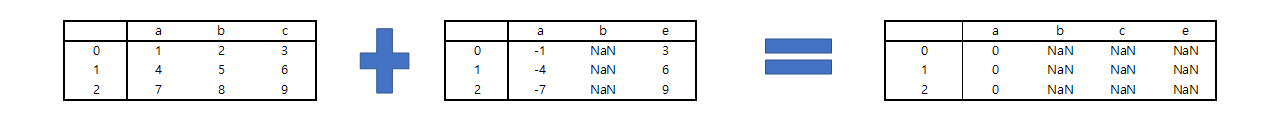

In [45]:
import pandas as pd
import numpy as np

df1 = pd.DataFrame({'a':[1,4,7], 'b':[2,5,8], 'c':[3,6,9]})
df1

df2 = pd.DataFrame({'a':[-1,-4,-7], 'b':[np.nan,np.nan,np.nan], 'e':[3,6,9]})
df2

df1 + df2

,a,b,c,e
0,0,NaN,NaN,NaN
1,0,NaN,NaN,NaN
2,0,NaN,NaN,NaN


In [46]:
pd.set_option('display.max_rows', 200)
#pd.set_option('display.max_rows', None)

df_samsung = pd.read_excel('../Data/samsung_kospi_excel.xlsx', sheet_name = 'samsung', index_col = 0)

df_kospi = pd.read_excel('../Data/samsung_kospi_excel.xlsx', sheet_name = 'kospi', index_col = 0)

df_kospi

,Close,Open,High,Low,Volume,Change
Date,,,,,,
2016-01-04,1918.76,1954.47,1954.52,1918.76,359020000.0,-0.0217
2016-01-05,1930.53,1911.93,1937.57,1911.93,446550000.0,0.0061
2016-01-06,1925.43,1934.25,1934.25,1911.61,594610000.0,-0.0026
2016-01-07,1904.33,1915.71,1926.41,1901.24,393040000.0,-0.0110
2016-01-08,1917.62,1889.42,1918.25,1883.82,430200000.0,0.0070
...,...,...,...,...,...,...
2021-12-20,2963.00,3001.33,3001.33,2962.07,377580000.0,-0.0181
2021-12-21,2975.03,2981.67,2984.56,2955.90,410980000.0,0.0041
2021-12-22,2984.48,2993.50,3000.79,2976.65,461760000.0,0.0032


In [48]:
sum(df_kospi['Change']>=0.01)

180

In [55]:
df_samsung[df_kospi[['Change']]>=0.01]

,Open,High,Low,Close,Volume,Change
Date,,,,,,
2016-01-04,NaN,NaN,NaN,NaN,NaN,NaN
2016-01-05,NaN,NaN,NaN,NaN,NaN,NaN
2016-01-06,NaN,NaN,NaN,NaN,NaN,NaN
2016-01-07,NaN,NaN,NaN,NaN,NaN,NaN
2016-01-08,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...
2021-12-20,NaN,NaN,NaN,NaN,NaN,NaN
2021-12-21,NaN,NaN,NaN,NaN,NaN,NaN
2021-12-22,NaN,NaN,NaN,NaN,NaN,NaN


In [54]:
df_samsung[df_kospi['Change']>=0.01]

,Open,High,Low,Close,Volume,Change
Date,,,,,,
2016-01-13,23060,23180,22960,22960,143316,0.001745
2016-01-22,22900,23360,22900,23360,147528,0.032714
2016-01-27,22520,23500,22520,23500,276237,0.033421
2016-02-04,23000,23220,22960,23120,247959,0.008726
2016-02-15,23080,23200,22880,23080,183146,0.021239
2016-02-16,23160,23580,23140,23360,180401,0.012132
2016-02-18,24060,24060,23560,23740,222481,0.001688
2016-03-02,24000,24140,23920,23940,236372,0.016129
2016-04-14,26000,26040,25780,26000,335327,0.019608


In [121]:
df_samsung[df_kospi['Change']>=0.01]['Change']*100
(df_samsung[df_kospi['Change']>=0.01]['Change']*100).describe()

count    180.000000
mean       2.087939
std        1.539910
min       -0.698080
25%        0.983679
50%        1.884999
75%        3.011250
max       10.470588
Name: Change, dtype: float64

## Sorting

1.  Index
    - df.sort_index(ascending = True or False)

2.  Value
    - df.sort_values(by = ‘컬럼이름’, ascending = True or False)

In [3]:
import pandas as pd

df_samsung = pd.read_excel('../Data/samsung_kospi_excel.xlsx', sheet_name = 'samsung', index_col = 0)

df_kospi = pd.read_excel('../Data/samsung_kospi_excel.xlsx', sheet_name = 'kospi', index_col = 0)

df_kospi

,Close,Open,High,Low,Volume,Change
Date,,,,,,
2016-01-04,1918.76,1954.47,1954.52,1918.76,359020000.0,-0.0217
2016-01-05,1930.53,1911.93,1937.57,1911.93,446550000.0,0.0061
2016-01-06,1925.43,1934.25,1934.25,1911.61,594610000.0,-0.0026
2016-01-07,1904.33,1915.71,1926.41,1901.24,393040000.0,-0.0110
2016-01-08,1917.62,1889.42,1918.25,1883.82,430200000.0,0.0070
...,...,...,...,...,...,...
2021-12-20,2963.00,3001.33,3001.33,2962.07,377580000.0,-0.0181
2021-12-21,2975.03,2981.67,2984.56,2955.90,410980000.0,0.0041
2021-12-22,2984.48,2993.50,3000.79,2976.65,461760000.0,0.0032


In [4]:
# 인덱스도 같아야하고 열의 shape도 같아야 원하는 모습나옴
pd.set_option('display.max_rows', 50)

df = pd.DataFrame()

df['Kospi_Return'] = df_kospi['Change']

df['Samsung_Return'] = df_samsung['Change']

df = df * 100
df

,Kospi_Return,Samsung_Return
Date,,
2016-01-04,-2.17,-4.365079
2016-01-05,0.61,0.248963
2016-01-06,-0.26,-2.731788
2016-01-07,-1.10,-1.021277
2016-01-08,0.70,0.687876
...,...,...
2021-12-20,-1.81,-1.153846
2021-12-21,0.41,1.297017
2021-12-22,0.32,1.664533


In [5]:
# Condition: Kospi가 2%상승한날과 삼성전자가 2%상승한날
pd.set_option('display.max_rows', None)

df['Kospi_Return']>=2
df['Samsung_Return'] >=2

(df['Kospi_Return'] >=2) & (df['Samsung_Return']>=2)

df['Condition'] = np.where(((df['Kospi_Return'] >=2) & (df['Samsung_Return']>=2)), df['Samsung_Return'], np.nan)

df_result = df.dropna()

df_result

,Kospi_Return,Samsung_Return,Condition
Date,,,
2016-01-22,2.11,3.271441,3.271441
2016-11-10,2.26,3.320802,3.320802
2017-05-08,2.30,3.295255,3.295255
2018-11-02,3.53,4.744958,4.744958
2020-02-06,2.88,2.689076,2.689076
2020-03-04,2.24,3.610108,3.610108
2020-03-20,7.44,5.704307,5.704307
2020-03-24,8.60,10.470588,10.470588
2020-03-25,5.89,3.620873,3.620873


In [6]:
# Sorting

# index _ Sorting

df_result.sort_index(ascending = False)

# Value _ Sorting

df_result.sort_values(by = 'Kospi_Return', ascending = True)

,Kospi_Return,Samsung_Return,Condition
Date,,,
2020-12-09,2.02,3.068340,3.068340
2016-01-22,2.11,3.271441,3.271441
2021-12-01,2.14,4.347826,4.347826
2021-01-25,2.18,2.995392,2.995392
2020-03-04,2.24,3.610108,3.610108
2020-05-19,2.25,3.073770,3.073770
2016-11-10,2.26,3.320802,3.320802
2017-05-08,2.30,3.295255,3.295255
2020-04-02,2.34,2.183406,2.183406


## reset_index & drop

1. reset_index()
    - df.reset_index(ascending = True or False)

2.  drop
    - df.drop(‘열이름’, axis = 1)
    - df.drop(‘행값’, axis = 0)

In [7]:
import pandas as pd
import numpy as np

df_samsung = pd.read_excel('../Data/samsung_kospi_excel.xlsx', sheet_name = 'samsung', index_col = 0)

df_kospi = pd.read_excel('../Data/samsung_kospi_excel.xlsx', sheet_name = 'kospi', index_col = 0)

df['Condition'] = np.where(((df['Kospi_Return'] >=2) & (df['Samsung_Return']>=2)), df['Samsung_Return'], np.nan)

df_result = df.dropna()

df_result

,Kospi_Return,Samsung_Return,Condition
Date,,,
2016-01-22,2.11,3.271441,3.271441
2016-11-10,2.26,3.320802,3.320802
2017-05-08,2.30,3.295255,3.295255
2018-11-02,3.53,4.744958,4.744958
2020-02-06,2.88,2.689076,2.689076
2020-03-04,2.24,3.610108,3.610108
2020-03-20,7.44,5.704307,5.704307
2020-03-24,8.60,10.470588,10.470588
2020-03-25,5.89,3.620873,3.620873


In [8]:
# reset_index

df_reset = df_result.reset_index()
df_reset


,Date,Kospi_Return,Samsung_Return,Condition
0,2016-01-22,2.11,3.271441,3.271441
1,2016-11-10,2.26,3.320802,3.320802
2,2017-05-08,2.30,3.295255,3.295255
3,2018-11-02,3.53,4.744958,4.744958
4,2020-02-06,2.88,2.689076,2.689076
5,2020-03-04,2.24,3.610108,3.610108
6,2020-03-20,7.44,5.704307,5.704307
7,2020-03-24,8.60,10.470588,10.470588
8,2020-03-25,5.89,3.620873,3.620873
9,2020-04-02,2.34,2.183406,2.183406


In [9]:
# drop
df_reset.drop(['Date','Kospi_Return','Samsung_Return'], axis = 1) # 기본 오리지널 데이터는 변하지않음 즉 대입해줘야함.

df_reset.drop(6, axis = 0)

,Date,Kospi_Return,Samsung_Return,Condition
0,2016-01-22,2.11,3.271441,3.271441
1,2016-11-10,2.26,3.320802,3.320802
2,2017-05-08,2.30,3.295255,3.295255
3,2018-11-02,3.53,4.744958,4.744958
4,2020-02-06,2.88,2.689076,2.689076
5,2020-03-04,2.24,3.610108,3.610108
7,2020-03-24,8.60,10.470588,10.470588
8,2020-03-25,5.89,3.620873,3.620873
9,2020-04-02,2.34,2.183406,2.183406
10,2020-04-06,3.85,3.617021,3.617021


## count

1.  unique()

2. count()

3. value_counts()

In [11]:
import pandas as pd
pd.set_option('display.max_rows', 200)
#pd.set_option('display.max_rows', None)

krx = pd.read_csv("../Data/KRX.csv", encoding = 'cp949', index_col = 0)
krx

,Symbol,Market,Name,Sector,Industry,ListingDate,SettleMonth,Representative,HomePage,Region,Unnamed: 11
0,60310,KOSDAQ,3S,전자부품 제조업,반도체 웨이퍼 캐리어,2002-04-23,03월,"박종익, 김세완 (각자 대표이사)",http://www.3sref.com,서울특별시,NaN
1,95570,KOSPI,AJ네트웍스,산업용 기계 및 장비 임대업,"렌탈(파렛트, OA장비, 건설장비)",2015-08-21,12월,박대현,http://www.ajnet.co.kr,서울특별시,NaN
2,6840,KOSPI,AK홀딩스,기타 금융업,지주사업,1999-08-11,12월,"채형석, 이석주(각자 대표이사)",http://www.aekyunggroup.co.kr,서울특별시,NaN
3,54620,KOSDAQ,APS홀딩스,기타 금융업,인터넷 트래픽 솔루션,2001-12-04,12월,정기로,http://www.apsholdings.co.kr,경기도,NaN
4,265520,KOSDAQ,AP시스템,특수 목적용 기계 제조업,디스플레이 제조 장비,2017-04-07,12월,김영주,http://www.apsystems.co.kr,경기도,NaN
...,...,...,...,...,...,...,...,...,...,...,...
7296,547,KOSPI,흥국화재2우B,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7297,545,KOSPI,흥국화재우,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7298,3280,KOSPI,흥아해운,해상 운송업,외항화물운송업(케미컬탱커),1976-06-29,12월,이환구,http://www.heung-a.com,서울특별시,NaN
7299,37440,KOSDAQ,희림,"건축기술, 엔지니어링 및 관련 기술 서비스업",설계 및 감리용역,2000-02-03,12월,"정영균, 이목운, 허철호 (각자대표)",http://www.heerim.com,서울특별시,NaN


In [134]:
krx['Sector'].unique()

array(['전자부품 제조업', '산업용 기계 및 장비 임대업', '기타 금융업', '특수 목적용 기계 제조업',
       '통신 및 방송 장비 제조업', nan, '종합 소매업', '기계장비 및 관련 물품 도매업', '봉제의복 제조업',
       '자동차 신품 부품 제조업', '영화, 비디오물, 방송프로그램 제작 및 배급업', '텔레비전 방송업',
       '도로 화물 운송업', '기타 식품 제조업', '음·식료품 및 담배 도매업', '의약품 제조업',
       '신탁업 및 집합투자업', '기타 전문 도매업', '소프트웨어 개발 및 공급업', '기타 화학제품 제조업',
       '컴퓨터 프로그래밍, 시스템 통합 및 관리업', '금융 지원 서비스업', '보험업', '반도체 제조업',
       '상품 중개업', '건물 건설업', '토목 건설업', '고무제품 제조업', '1차 비철금속 제조업',
       '1차 철강 제조업', '자연과학 및 공학 연구개발업',
       '전동기, 발전기 및 전기 변환 · 공급 · 제어 장치 제조업', '부동산 임대 및 공급업', '생활용품 도매업',
       '기타 섬유제품 제조업', '유원지 및 기타 오락관련 서비스업', '상품 종합 도매업', '전기 및 통신 공사업',
       '해상 운송업', '합성고무 및 플라스틱 물질 제조업', '일반 목적용 기계 제조업', '영상 및 음향기기 제조업',
       '오디오물 출판 및 원판 녹음업', '유리 및 유리제품 제조업', '시멘트, 석회, 플라스터 및 그 제품 제조업',
       '폐기물 처리업', '기초 화학물질 제조업', '플라스틱제품 제조업', '기초 의약물질 및 생물학적 제제 제조업',
       '그외 기타 운송장비 제조업', '전기 통신업', '담배 제조업', '기타 정보 서비스업', '무기 및 총포탄 제조업',
       '알코올음료 제조업', '자료처리, 호스팅, 포털 및 기타 인터넷 정보매개 서비스업',
       

In [135]:
krx['Sector'].count()

2487

In [136]:
krx['Sector'].value_counts()

소프트웨어 개발 및 공급업                           152
특수 목적용 기계 제조업                            143
전자부품 제조업                                 128
자동차 신품 부품 제조업                             96
의약품 제조업                                   95
기타 화학제품 제조업                               94
기타 금융업                                    92
금융 지원 서비스업                                74
통신 및 방송 장비 제조업                            72
자연과학 및 공학 연구개발업                           59
반도체 제조업                                   58
1차 철강 제조업                                 57
의료용 기기 제조업                                56
일반 목적용 기계 제조업                             45
플라스틱제품 제조업                                44
기초 화학물질 제조업                               43
기초 의약물질 및 생물학적 제제 제조업                     39
기타 전문 도매업                                 38
컴퓨터 프로그래밍, 시스템 통합 및 관리업                   37
전동기, 발전기 및 전기 변환 · 공급 · 제어 장치 제조업         35
기타 식품 제조업                                 34
영화, 비디오물, 방송프로그램 제작 및 배급업                 32
의료용품 및 기타 

In [137]:
krx[krx['Sector'] == "석유 정제품 제조업"]

,Symbol,Market,Name,Sector,Industry,ListingDate,SettleMonth,Representative,HomePage,Region,Unnamed: 11
1892,10950,KOSPI,S-Oil,석유 정제품 제조업,"석유제품,가스,윤활기유,윤활유,그리스,석유화학제품 제조,도매",1987-05-27,12월,Hussain A.Al-Qahtani,http://www.s-oil.com,서울특별시,NaN
1933,96770,KOSPI,SK이노베이션,석유 정제품 제조업,"석유정제,석유화학제품,윤활유제품,아스팔트제품,의약중간체 제조,판매,유전개발,대체에너지사업",2007-07-25,12월,김준,http://www.SKinnovation.com,서울특별시,NaN
2232,14530,KOSPI,극동유화,석유 정제품 제조업,"윤활유,유동파라핀,왁스,방수용시트,아스팔트 제조/수입자동차,부품 도매/가스충전,산업...",1991-01-31,12월,"장홍선, 장선우 (각자대표)",http://www.kdoc.co.kr,경상남도,NaN
3936,3650,KOSPI,미창석유,석유 정제품 제조업,"윤활유,고무배합유,전기절연유 제조,판매,수출입",1989-09-27,12월,유재순,http://www.michang.co.kr,부산광역시,NaN
7059,2960,KOSPI,한국쉘석유,석유 정제품 제조업,"윤활유,그리스 제조,도매",1988-08-10,12월,라머스 예룬 피터,http://www.shell.co.kr,부산광역시,NaN
7226,267250,KOSPI,현대중공업지주,석유 정제품 제조업,지주회사,2017-05-10,12월,권오갑,http://www.hyundai-holdings.co.kr,서울특별시,NaN


## GroupBy

df.groupby([‘컬럼이름’]).mean()

df.groupby([‘컬럼이름’]).count()

df.groupby([‘컬럼이름’]).std()

Etc…

https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.groupby.html

In [13]:
df = pd.read_excel('../Data/groupby_example.xlsx', header = 6)
df

,Unnamed: 0,Unnamed: 1,Sector,PER,Unnamed: 4,Unnamed: 5
0,NaN,기업1,반도체,1.5,NaN,NaN
1,NaN,기업2,통신,1.1,NaN,NaN
2,NaN,기업3,화학,0.5,NaN,NaN
3,NaN,기업4,플랫폼,3.0,NaN,NaN
4,NaN,기업5,바이오,10.0,NaN,NaN
5,NaN,기업6,통신,1.6,NaN,NaN
6,NaN,기업7,화학,0.7,NaN,NaN
7,NaN,기업8,바이오,15.0,NaN,NaN
8,NaN,기업9,반도체,2.0,NaN,NaN
9,NaN,기업10,통신,1.6,NaN,NaN


In [26]:
import pandas as pd
pd.set_option('display.max_rows', 200)
#pd.set_option('display.max_rows', None)

df = pd.read_excel('../Data/groupby_example.xlsx', header = 6)

df = df.dropna(axis = 1)
df.columns = ['기업', 'Sector', 'PER']
df.index = df['기업']
df = df.drop('기업', axis = 1)
df

,Sector,PER
기업,,
기업1,반도체,1.5
기업2,통신,1.1
기업3,화학,0.5
기업4,플랫폼,3.0
기업5,바이오,10.0
기업6,통신,1.6
기업7,화학,0.7
기업8,바이오,15.0
기업9,반도체,2.0


In [29]:
undervalued_mean = df.groupby(['Sector']).mean().loc['화학'].values[0]
undervalued_mean

0.6666666666666666

In [17]:
undervalued_mean = df.groupby(['Sector']).mean().loc['화학'].values[0]
undervalued_mean

df.groupby(['Sector']).mean()

,PER
Sector,
바이오,9.800000
반도체,1.620000
통신,1.440000
플랫폼,3.425000
화학,0.666667


In [19]:
df[df['Sector'] == '화학']

,Sector,PER
기업,,
기업3,화학,0.5
기업7,화학,0.7
기업11,화학,0.7
기업19,화학,1.1
기업20,화학,0.4
기업24,화학,0.6


In [21]:
df_che['PER']<=undervalued_mean

기업
기업3      True
기업7     False
기업11    False
기업19    False
기업20     True
기업24     True
Name: PER, dtype: bool

In [18]:
df_che = df[df['Sector'] == '화학']
df_che['Condition'] = np.where(df_che['PER']<=undervalued_mean,1,np.nan)
df_che.dropna().index

C:\Users\User\AppData\Local\Temp\ipykernel_9616\1472975491.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_che['Condition'] = np.where(df_che['PER']<=undervalued_mean,1,np.nan)


Index(['기업3', '기업20', '기업24'], dtype='object', name='기업')